# ABS tutorial 02

## basics of `abssep` class

In this tutorial we write a simple data processing pipeline manually and show when and how ABS method comes into the CMB extraction.

In [1]:
import numpy as np
import matplotlib
import healpy as hp
import logging as log
import abspy as ap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#log.basicConfig(filename='abspy_tutorial02.log', level=log.DEBUG)

### read in maps

- `TQU_xxGHz_r6.fits`, corresponds to $N_{side}$ 64, prepared by $a_{\ell m}s$ with $\ell_{max} = 2048$, and FWHM $= 1.8 deg$ for `alm2map`.

In [2]:
map95 = hp.read_map('./data/TQU_95GHz_r6.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map150 = hp.read_map('./data/TQU_150GHz_r6.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map353 = hp.read_map('./data/TQU_353GHz_r6.fits',field=[0,1,2],dtype=np.float64,verbose=0)
mapcmb = hp.read_map('./data/TQU_CMB_r6.fits',field=[0,1,2],dtype=np.float64,verbose=0)
print (map95.shape, map95.dtype)

(3, 49152) float64


- visualize

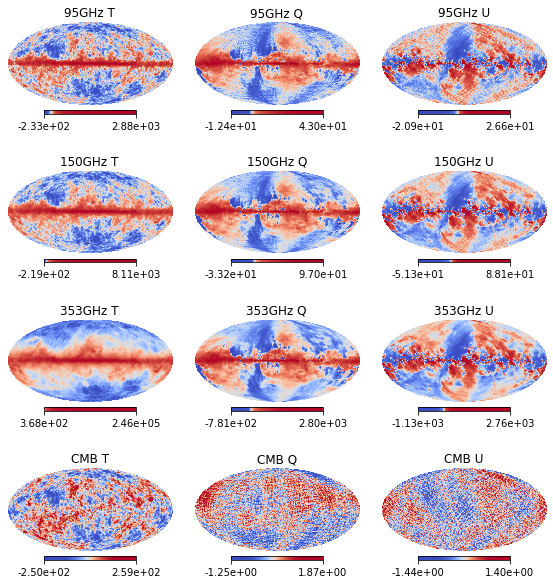

In [3]:
fig = matplotlib.pyplot.figure(figsize=(10,10))
gs = matplotlib.gridspec.GridSpec(55, 30)

fig.add_subplot(gs[0:10, 0:10])
hp.mollview(map95[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='95GHz T',cbar=1)
fig.add_subplot(gs[0:10, 10:20])
hp.mollview(map95[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='95GHz Q',cbar=1)
fig.add_subplot(gs[0:10, 20:30])
hp.mollview(map95[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='95GHz U',cbar=1)

fig.add_subplot(gs[15:25, 0:10])
hp.mollview(map150[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='150GHz T',cbar=1)
fig.add_subplot(gs[15:25, 10:20])
hp.mollview(map150[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='150GHz Q',cbar=1)
fig.add_subplot(gs[15:25, 20:30])
hp.mollview(map150[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='150GHz U',cbar=1)

fig.add_subplot(gs[30:40, 0:10])
hp.mollview(map353[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='353GHz T',cbar=1)
fig.add_subplot(gs[30:40, 10:20])
hp.mollview(map353[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='353GHz Q',cbar=1)
fig.add_subplot(gs[30:40, 20:30])
hp.mollview(map353[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='353GHz U',cbar=1)

fig.add_subplot(gs[45:55, 0:10])
hp.mollview(mapcmb[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='CMB T',cbar=1)
fig.add_subplot(gs[45:55, 10:20])
hp.mollview(mapcmb[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='CMB Q',cbar=1)
fig.add_subplot(gs[45:55, 20:30])
hp.mollview(mapcmb[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='CMB U',cbar=1)

### assemble $C^{XX}_\ell$s to ABSpy required shape (without noise)

- total PS, comes in shape $(N_\ell,N_\nu,N_\nu)$

In [4]:
Nfreq = 3  # 95,150,353
Nell = 180  # Nside 64 corresponds to maximal 192
print ('number of frequency bands',Nfreq)
print ('number of angular modes',Nell)

tt_total = np.zeros((Nell+1,Nfreq,Nfreq))
ee_total = np.zeros((Nell+1,Nfreq,Nfreq))
bb_total = np.zeros((Nell+1,Nfreq,Nfreq))

number of frequency bands 3
number of angular modes 180


In [5]:
f95auto = hp.anafast(map95,lmax=Nell)
f150auto = hp.anafast(map150,lmax=Nell)
f353auto = hp.anafast(map353,lmax=Nell)
f95f150 = hp.anafast(map95,map150,lmax=Nell)
f95f353 = hp.anafast(map95,map353,lmax=Nell)
f150f353 = hp.anafast(map150,map353,lmax=Nell)

print (f95auto.shape, f95auto.dtype)

for i in range(Nell+1):
    # diagnoal
    tt_total[i,0,0] = f95auto[0,i]
    tt_total[i,1,1] = f150auto[0,i]
    tt_total[i,2,2] = f353auto[0,i]
    
    ee_total[i,0,0] = f95auto[1,i]
    ee_total[i,1,1] = f150auto[1,i]
    ee_total[i,2,2] = f353auto[1,i]
    
    bb_total[i,0,0] = f95auto[2,i]
    bb_total[i,1,1] = f150auto[2,i]
    bb_total[i,2,2] = f353auto[2,i]
    # cross
    tt_total[i,0,1] = f95f150[0,i]
    tt_total[i,0,2] = f95f353[0,i]
    tt_total[i,1,2] = f150f353[0,i]
    tt_total[i,1,0] = tt_total[i,0,1]
    tt_total[i,2,0] = tt_total[i,0,2]
    tt_total[i,2,1] = tt_total[i,1,2]
    
    ee_total[i,0,1] = f95f150[1,i]
    ee_total[i,0,2] = f95f353[1,i]
    ee_total[i,1,2] = f150f353[1,i]
    ee_total[i,1,0] = ee_total[i,0,1]
    ee_total[i,2,0] = ee_total[i,0,2]
    ee_total[i,2,1] = ee_total[i,1,2]
    
    bb_total[i,0,1] = f95f150[2,i]
    bb_total[i,0,2] = f95f353[2,i]
    bb_total[i,1,2] = f150f353[2,i]
    bb_total[i,1,0] = bb_total[i,0,1]
    bb_total[i,2,0] = bb_total[i,0,2]
    bb_total[i,2,1] = bb_total[i,1,2]

(6, 181) float64


### use the ABSpy module

the `__call__` or `run()` function returns:

- angular mode position $\ell_{binned}$
- CMB power-spectrum $D_\ell$, normalized with $\frac{\ell(\ell+1)}{2\pi}$, at $\ell_{binned}$

In [6]:
separator = ap.abssep(tt_total,lbin=10,shift=10.,cut=1.)
rslt_tt = separator()

In [7]:
separator = ap.abssep(ee_total,lbin=10,shift=10.,cut=1.)
rslt_ee = separator()

In [8]:
separator = ap.abssep(bb_total,lbin=10,shift=10.,cut=1.)
rslt_bb = separator()

(1e-07, 10000000.0)

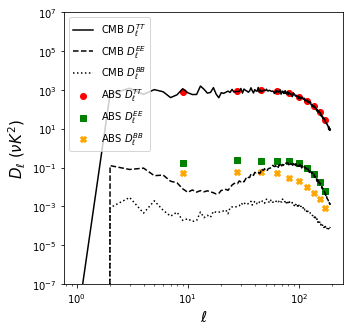

In [9]:
fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))

ax.scatter(rslt_tt[0],rslt_tt[1],
           color='red',marker='o',label=r'ABS $D^{TT}_\ell$')
ax.scatter(rslt_ee[0],rslt_ee[1],
           color='green',marker='s',label=r'ABS $D^{EE}_\ell$')
ax.scatter(rslt_bb[0],rslt_bb[1],
           color='orange',marker='X',label=r'ABS $D^{BB}_\ell$')

cmb_cl = hp.anafast(mapcmb)
ell = np.arange(cmb_cl.shape[1])
ax.plot((0.5/np.pi)*ell*(ell+1)*cmb_cl[0],
        color='black',linestyle='-',label=r'CMB $D^{TT}_\ell$')
ax.plot((0.5/np.pi)*ell*(ell+1)*cmb_cl[1],
        color='black',linestyle='--',label=r'CMB $D^{EE}_\ell$')
ax.plot((0.5/np.pi)*ell*(ell+1)*cmb_cl[2],
        color='black',linestyle=':',label=r'CMB $D^{BB}_\ell$')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=2)
ax.set_xlabel(r'$\ell$',fontsize=15)
ax.set_ylabel(r'$D_\ell$ ($\nu K^2$)',fontsize=15)
ax.set_ylim((1.e-7,1.e7))

end